# Attempt to solve Fashion MNIST Dataset using Dense Neural Network
## Bibliography 
* Keras official Tutorial
* Deep Learning with Python by François Chollet

## About DataSet 
**Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.**


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import os
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
 
from tensorflow.keras.layers import Conv2D, MaxPooling2D,\
Dense, Flatten
 
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report


/var/folders/zt/xjs590bs1lg2_lh8_rlb8_cw0000gn/T/ipykernel_99213/49011060.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-03-12 03:13:06.309228: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/macbookpro/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, c

# Load Dataset and Split it to test and train set

see this link
https://medium.com/the-data-science-publication/how-to-import-and-display-the-fashion-mnist-dataset-using-tensorflow-e72522f684d0

In [57]:
#Getting training and testing data from tensorflow

In [55]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()


28*28 image pixels

In [37]:
#Training Set shape# Print the dimensions of the dataset
print('Train: X = ', trainX.shape)


Train: X =  (60000, 28, 28)


In [38]:
#Test Set consists of 10000 samples with one label field and 28*28 image pixels
print('Test: X = ', testX.shape)

Test: X =  (10000, 28, 28)


In [39]:
#Labels from 0 to 9 are following Items 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Split training data to train and valid

In [40]:
trainX, validX, trainy, validy = train_test_split(trainX, trainy, test_size=0.2, random_state=42)

## Some images with their labels 

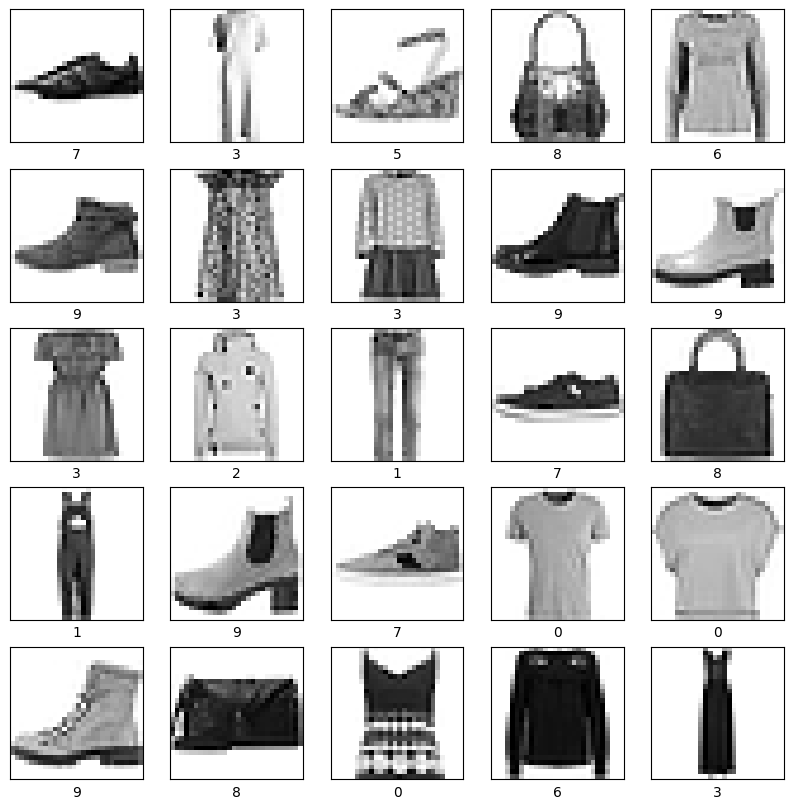

In [41]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(trainy[i])
plt.show()


In [42]:
# Rescaling training to range 0 to 1 by dividing them by 255
trainX = trainX.astype('float32') / 255.0


In [43]:
trainX, validX, trainy, validy = train_test_split(trainX, trainy, test_size=0.2, random_state=42)


**Creating a Deep Neural Network with any number of layer you want.**

In [44]:
model = models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(784,)))
model.add(layers.Dense(10,activation='softmax'))

**Compiling the model.**

In [59]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              run_eagerly=True)


**Training model with a part of training data and evaluating it with another part of training data
and get more than 90% val_acc**

In [46]:
tf.keras.backend.clear_session()


In [47]:
# Flatten the input data to match the expected input shape of the model
trainX_flat = trainX.reshape((trainX.shape[0], 784))
validX_flat = validX.reshape((validX.shape[0], 784))

# Train the model with the training data
history = model.fit(trainX_flat, trainy, epochs=15, batch_size=128, validation_data=(validX_flat, validy))


Epoch 1/15
300/300 [==============================] - 10s 32ms/step - loss: 0.6190 - accuracy: 0.7927 - val_loss: 0.4584 - val_accuracy: 0.8479
Epoch 2/15
300/300 [==============================] - 8s 27ms/step - loss: 0.4466 - accuracy: 0.8442 - val_loss: 0.4117 - val_accuracy: 0.8585
Epoch 3/15
300/300 [==============================] - 8s 26ms/step - loss: 0.4033 - accuracy: 0.8582 - val_loss: 0.4152 - val_accuracy: 0.8500
Epoch 4/15
300/300 [==============================] - 8s 26ms/step - loss: 0.3791 - accuracy: 0.8661 - val_loss: 0.3699 - val_accuracy: 0.8721
Epoch 5/15
300/300 [==============================] - 8s 26ms/step - loss: 0.3585 - accuracy: 0.8721 - val_loss: 0.3458 - val_accuracy: 0.8774
Epoch 6/15
300/300 [==============================] - 8s 26ms/step - loss: 0.3383 - accuracy: 0.8779 - val_loss: 0.3629 - val_accuracy: 0.8680
Epoch 7/15
300/300 [==============================] - 8s 26ms/step - loss: 0.3261 - accuracy: 0.8820 - val_loss: 0.3462 - val_accuracy: 0.876

# Visualize Model Training History in Keras

See this link
https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

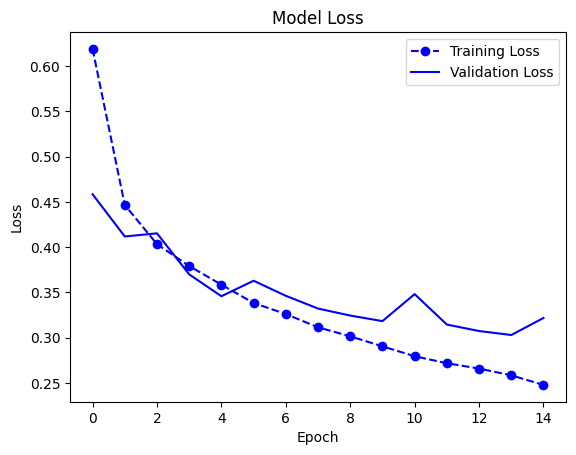

In [48]:

plt.plot(history.history['loss'], 'bo--', label='Training Loss')

plt.plot(history.history['val_loss'], 'b-', label='Validation Loss')

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()


# Evaluate the model with our Test Set Using confusion_matrix

-split data to X_test and Y_test
-Rescaling training to range 0 to 1 by dividing them by 255

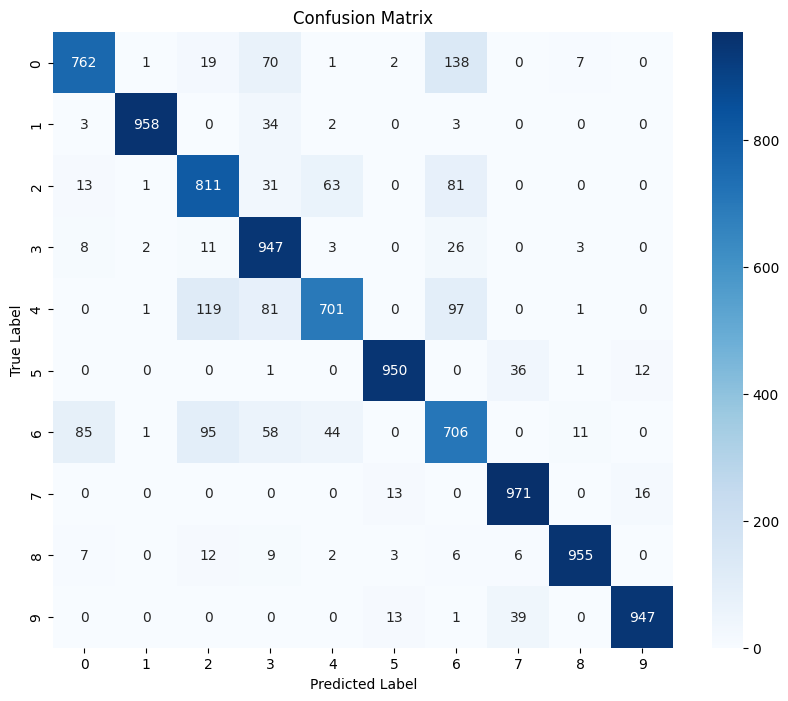

In [51]:
# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix with colors
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


visualization

Find classification_report for the prediction

In [52]:
# Generate a classification report
report = classification_report(y_test, y_pred_classes)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1000
           1       0.99      0.96      0.98      1000
           2       0.76      0.81      0.78      1000
           3       0.77      0.95      0.85      1000
           4       0.86      0.70      0.77      1000
           5       0.97      0.95      0.96      1000
           6       0.67      0.71      0.69      1000
           7       0.92      0.97      0.95      1000
           8       0.98      0.95      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



Use model.evaluate the test data

In [53]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


313/313 [==============================] - 3s 11ms/step - loss: 0.3669 - accuracy: 0.8708
Test Loss: 0.3668901026248932
Test Accuracy: 0.8708000183105469
